**IMAGE CLASSIFICATION CIFAR-10**
---



## Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.datasets import cifar10

In [ ]:
from skimage import feature
from skimage import color

## Load data

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 19s 0us/step
X_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


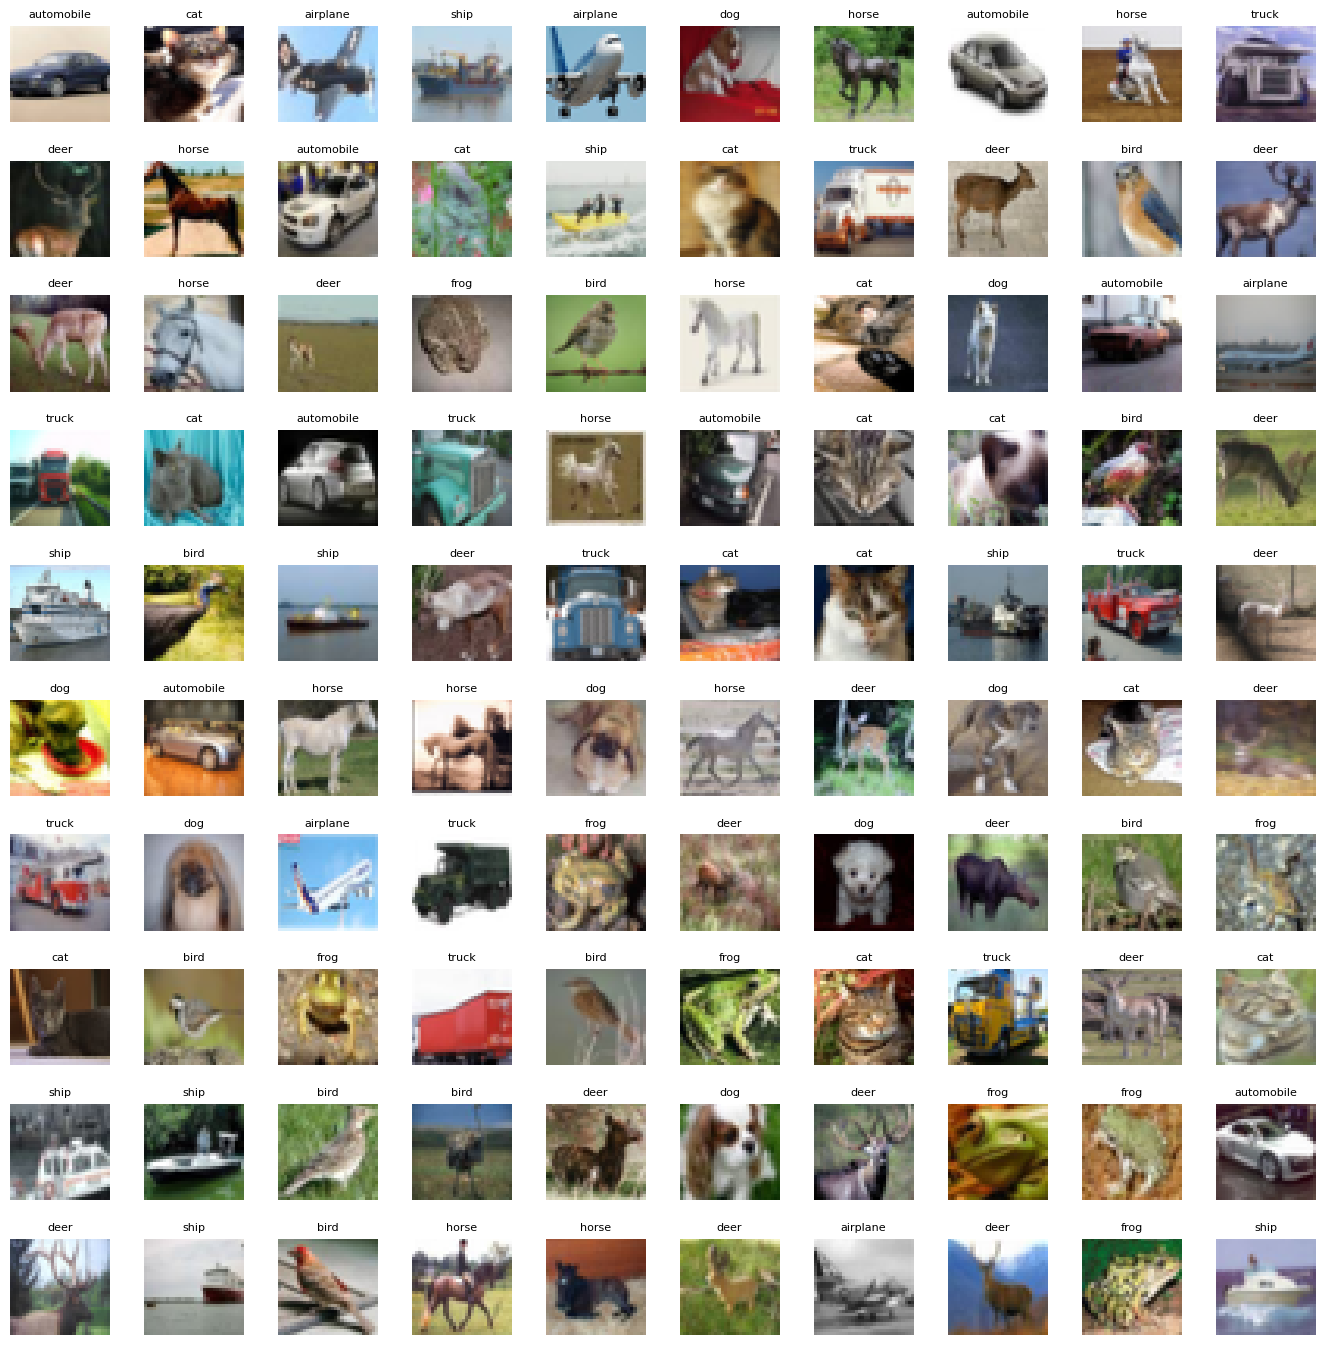

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']


fig, axes = plt.subplots(10, 10, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(X_train)

for i in np.arange(0, 10 * 10):
    index = np.random.randint(0, n_train)
    axes[i].imshow(X_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)


## Preprocessing

In [ ]:
# mengubah tipe data menjadi float
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalisasi menggunakan mean dan std dev
mean = np.mean(X_train, axis = (0,1,2,3))
std = np.std(X_train, axis = (0,1,2,3))

X_train = (X_train-mean)/(std + 1e-7)
X_test = (X_test-mean)/(std + 1e-7)


# convert variabel target menjadi kategorik
y_train_cat = keras.utils.to_categorical(y_train,10)
y_test_cat = keras.utils.to_categorical(y_test,10)
input_shape = X_train.shape[1:]
input_shape

(32, 32, 3)

## Model CNN

**Convolutional Neural Networks (CNNs)** adalah jenis jaringan saraf tiruan (Artificial Neural Networks) yang khusus dirancang untuk tugas-tugas pemrosesan gambar dan data yang memiliki struktur grid, seperti citra atau video. CNN bekerja sangat baik untuk klasifikasi gambar karena kemampuannya untuk secara otomatis mengekstrak fitur dari gambar tanpa memerlukan preprocessing manual seperti algoritma tradisional.

**Cara Kerja CNN:**

* Convolutional Layers
  
  Melakukan operasi convolusi yang memindai gambar dengan filter untuk mendeteksi pola seperti tepi, sudut, tekstur, dan pola yang lebih kompleks di lapisan yang lebih dalam.

* Pooling Layers
  
  Mengurangi dimensi fitur yang dihasilkan oleh convolusi untuk menurunkan kompleksitas komputasi dan menangkap fitur penting.

* Fully Connected Layers
  
  Mengambil hasil dari lapisan convolusi dan pooling untuk membuat prediksi berdasarkan fitur yang dipelajari.

* Activation Functions

  Fungsi aktivasi seperti ReLU (Rectified Linear Unit) digunakan untuk mengintroduksi non-linearitas, sehingga jaringan dapat mempelajari pola yang lebih kompleks.

**Alasan menggunakan CNN:**

* CNN mampu mengenali fitur visual secara otomatis (tanpa feature engineering manual seperti GLCM).
* Invariansi spasial: CNN dapat mendeteksi objek dalam gambar terlepas dari lokasinya.
* Efisien untuk pemrosesan gambar dan dapat menangani tugas klasifikasi dengan data gambar besar seperti CIFAR-10.

In [ ]:
weight_decay = 1e-4

model = Sequential()
#layer1
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', input_shape = input_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.2))
#layer2
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
#layer3
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(filters = 128, kernel_size = (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │              

 Total params: 309,290 (1.18 MB)

 Trainable params: 308,394 (1.18 MB)

 Non-trainable params: 896 (3.50 KB)

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer= keras.optimizers.RMSprop(learning_rate = 0.001, decay = 1e-6),
              metrics=['accuracy'])

epochs_hist = model.fit(X_train, y_train_cat, batch_size=64, epochs=50, validation_split=0.2, shuffle=True)

Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.3626 - loss: 2.3154 - val_accuracy: 0.5860 - val_loss: 1.2972
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6129 - loss: 1.2147 - val_accuracy: 0.6841 - val_loss: 1.0051
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6927 - loss: 0.9628 - val_accuracy: 0.7422 - val_loss: 0.8153
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7264 - loss: 0.8637 - val_accuracy: 0.7595 - val_loss: 0.7861
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7633 - loss: 0.7642 - val_accuracy: 0.7723 - val_loss: 0.7439
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7937 - loss: 0.6892 - val_accuracy: 0.7915 - val_loss: 0.7162
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8034 - loss: 0.6613 - val_accuracy: 0.8039 - val_loss: 0.6688
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8197 - loss: 0.6230 - val_accuracy

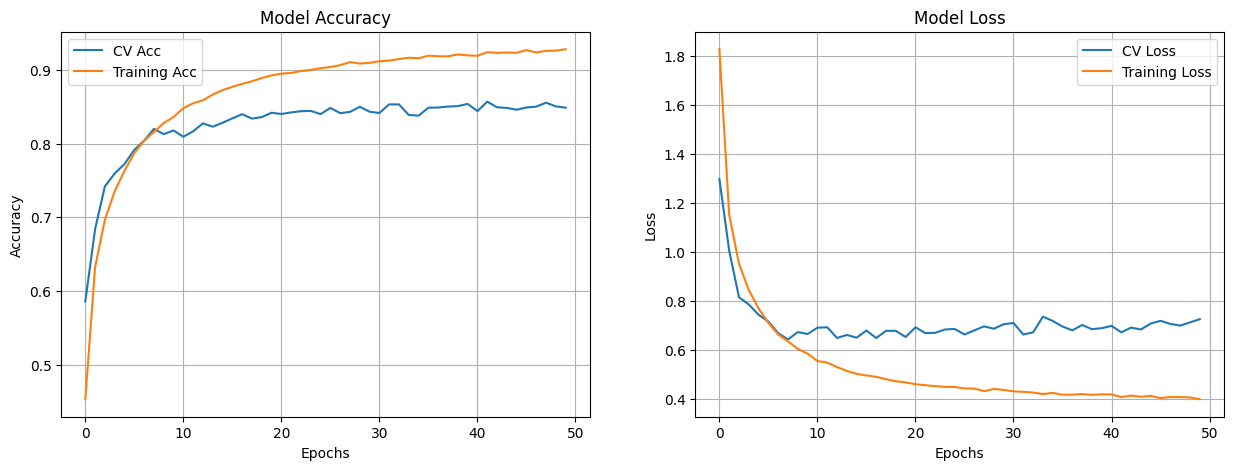

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(epochs_hist.history['val_accuracy'], label = 'CV Acc')
plt.plot(epochs_hist.history['accuracy'], label = 'Training Acc')
plt.title("Model Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs_hist.history['val_loss'], label = 'CV Loss')
plt.plot(epochs_hist.history['loss'], label = 'Training Loss')
plt.title("Model Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

**Loss Function: Categorical Cross-Entropy**

Categorical Cross-Entropy Formula:
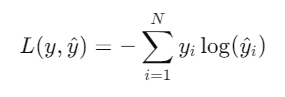

    y adalah label sebenarnya (one-hot encoded label).

    y topi adalah probabilitas prediksi yang diberikan oleh model.

Alasan Penggunaan:
* Mengukur probabilitas: Cross-entropy mengukur seberapa baik distribusi probabilitas dari prediksidibandingkan dengan label sebenarnya
* Cocok untuk klasifikasi multi-kelas, di mana kita ingin menghitung seberapa jauh prediksi model dari distribusi target.

## Evaluation

In [ ]:
score = model.evaluate(X_test, y_test_cat, batch_size=128, verbose=1)
print("Accuracy on Test Set : {:.2f}%".format(score[1]*100))


79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8418 - loss: 0.7606
Accuracy on Test Set : 84.53%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


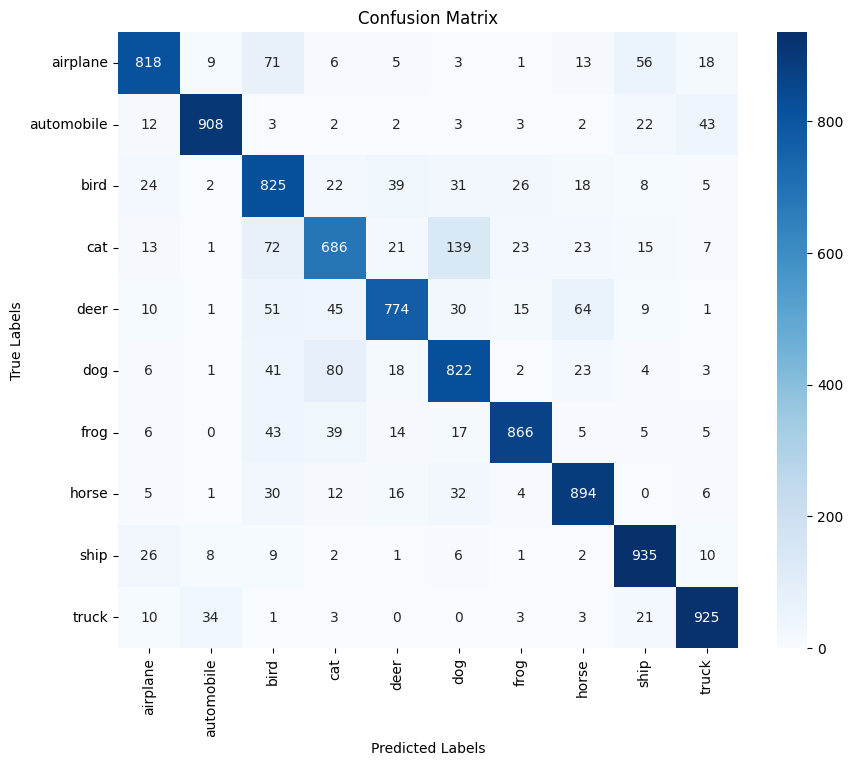

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the classes for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

**Metrik Evaluasi: Accuracy, Precision, Recall, dan F1-Score**

1. Accuracy: Persentase prediksi benar dari seluruh prediksi.

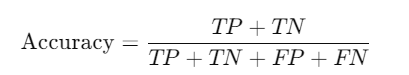

2. Precision: Persentase prediksi positif yang benar dari seluruh prediksi positif.

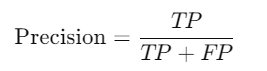

3. Recall (Sensitivity): Persentase prediksi positif yang benar dari total kelas positif yang sebenarnya.

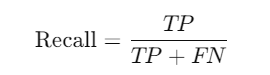

4. F1-Score: Rata-rata harmonis antara precision dan recall.

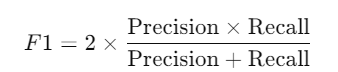

**Alasan Penggunaan Metrik:**

  * Accuracy memberikan gambaran umum kinerja, tetapi dalam klasifikasi tidak seimbang, Precision, Recall, dan F1-Score penting untuk mengevaluasi kemampuan model dalam menangani setiap kelas.

  * F1-Score sangat berguna saat terdapat trade-off antara precision dan recall.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 84.53%
Precision: 84.79%
Recall: 84.53%
F1-score: 84.52%


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true_classes, y_pred_classes, target_names=labels)
print(report)

              precision    recall  f1-score   support

    airplane       0.88      0.82      0.85      1000
  automobile       0.94      0.91      0.92      1000
        bird       0.72      0.82      0.77      1000
         cat       0.76      0.69      0.72      1000
        deer       0.87      0.77      0.82      1000
         dog       0.76      0.82      0.79      1000
        frog       0.92      0.87      0.89      1000
       horse       0.85      0.89      0.87      1000
        ship       0.87      0.94      0.90      1000
       truck       0.90      0.93      0.91      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



Berdasarkan metrik penilaian

Dengan akurasi 84.53%, model CNN yang digunakan sudah cukup baik untuk klasifikasi CIFAR-10.
Precision dan recall yang berada di sekitar angka 84% menunjukkan bahwa model dapat membuat prediksi yang cukup spesifik dan sensitif terhadap berbagai objek dalam gambar.
F1-score 84.25% menunjukkan bahwa model tidak hanya menghindari kesalahan tetapi juga dapat mengenali objek dengan konsistensi yang tinggi.